In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [0]:
# median values of homes in thousands of dollars
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [0]:
# feature-wise normalisation
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  print(model.summary())
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [0]:
# k-fold validation
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold {0}'.format(i))
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]], 
      axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], 
      axis=0
  )

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold 0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None









processing fold 1
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 64)       

In [0]:
all_scores

[2.283722192934244, 2.4472557837420172, 2.593833100677717, 2.56167208086146]

In [0]:
np.mean(all_scores)

2.4716207895538593

In [0]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold {0}'.format(i))
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]], 
      axis=0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], 
      axis=0
  )

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=1, verbose=0)
  
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold 0
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None
processing fold 1
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                

In [0]:
average_mae_histories = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_histories

[4.517972247435315,
 3.36221442128172,
 3.0450467827296492,
 2.7430949116697407,
 2.747774114703188,
 2.6780497933378316,
 2.6851492175961487,
 2.528237309786353,
 2.68302057403149,
 2.58995523193095,
 2.5349567927936514,
 2.668735632802,
 2.4768504966603646,
 2.565143351507659,
 2.602549996706519,
 2.4949999858837315,
 2.631193236549302,
 2.511684097866021,
 2.5495472084177604,
 2.5372296264856167,
 2.4597753250952996,
 2.3712819342566007,
 2.4410374884558195,
 2.4793623308144,
 2.5210737568317074,
 2.608766552245263,
 2.279467475296247,
 2.427469601725588,
 2.3366027362275834,
 2.4423357094868576,
 2.4395636461748937,
 2.502962820600755,
 2.4275158325044237,
 2.437848717859476,
 2.4140363247087686,
 2.364279873300307,
 2.319275400426128,
 2.286507548672138,
 2.404346309085884,
 2.3498444096876843,
 2.297297907347726,
 2.313148867965925,
 2.3958620954268053,
 2.4135228584308437,
 2.4897157933452343,
 2.398616624350595,
 2.359633719567025,
 2.387922998702172,
 2.3837661920207562,
 2.44

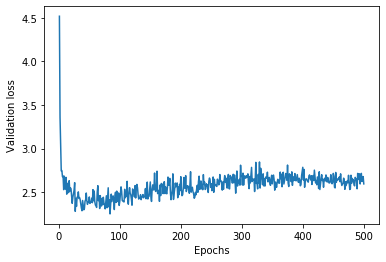

In [0]:
# plot the average mae errors
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_histories)+1), average_mae_histories)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

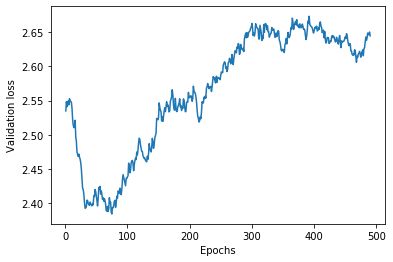

In [0]:
# smooth curve
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_histories[10:])  # ignore the first 10 points due to large scale

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()